Les biens recensés AirBnb Bordeaux 

Depuis l’an 2018 la ville de Bordeaux vit une pénurie de logements, de nombreux d’articles de la presse y sont consacrés en pointant du doigt les locations courte durée qui sont largement dominé par le géant AirBnB, ce marché est réglementé par la municipalité mais est ce suffisant pour pour donner le souffle? Pour cette raison il est important de voir la situation actuel un peu plus en détails. Pour cela vous allez effectué une récupération des données qui datent du 25 mai 2020. Toutes les données sont recuperées depuis le site insideairbnb.com

In [4]:
from IPython.core.display import display, HTML
import IPython.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium
from folium.plugins import FastMarkerCluster


quartiers = pd.read_csv("listings.csv", index_col= "id")

quartiers_details = pd.read_csv("listings_raw.csv", index_col= "id", low_memory=False)

calendrier = pd.read_csv("calendar.csv", parse_dates=['date'], index_col=['listing_id'])

reviews_details = pd.read_csv("reviews.csv", parse_dates=['date'])

In [3]:
# 1. Visionez nombre de biens dans le fichier de quartiers
print(quartiers.shape)

(10751, 15)


In [4]:
# 2. Visionez la composition du tableau de quarties
quartiers.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
28925,Grande maison centre ville Comme à la campagne,124398,Laurence,Bordeaux,Centre ville (Bordeaux),44.84910,-0.59350,Entire home/apt,24,2,2,2018-07-06,0.06,1,255
185534,L'Echoppe typique de Bordeaux - tout confort,890736,Aurore,Bordeaux,Saint Augustin - Tauzin - Alphonse Dupeux,44.83063,-0.59331,Entire home/apt,125,4,0,NaN,NaN,1,97
218103,B&B (Website hidden by Airbnb) tropical garden,1127981,Luis,Bgles,Bgles,44.81418,-0.54842,Entire home/apt,100,2,32,2019-11-24,0.31,4,263
222887,"Bordeaux Terrace - spectacular view, fast Wifi",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83611,-0.56640,Entire home/apt,175,3,38,2019-11-11,0.37,4,269
317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.84782,-0.58105,Entire home/apt,155,3,24,2020-03-08,0.34,4,337


Bon il est temps de passer à l'echauffement !!!

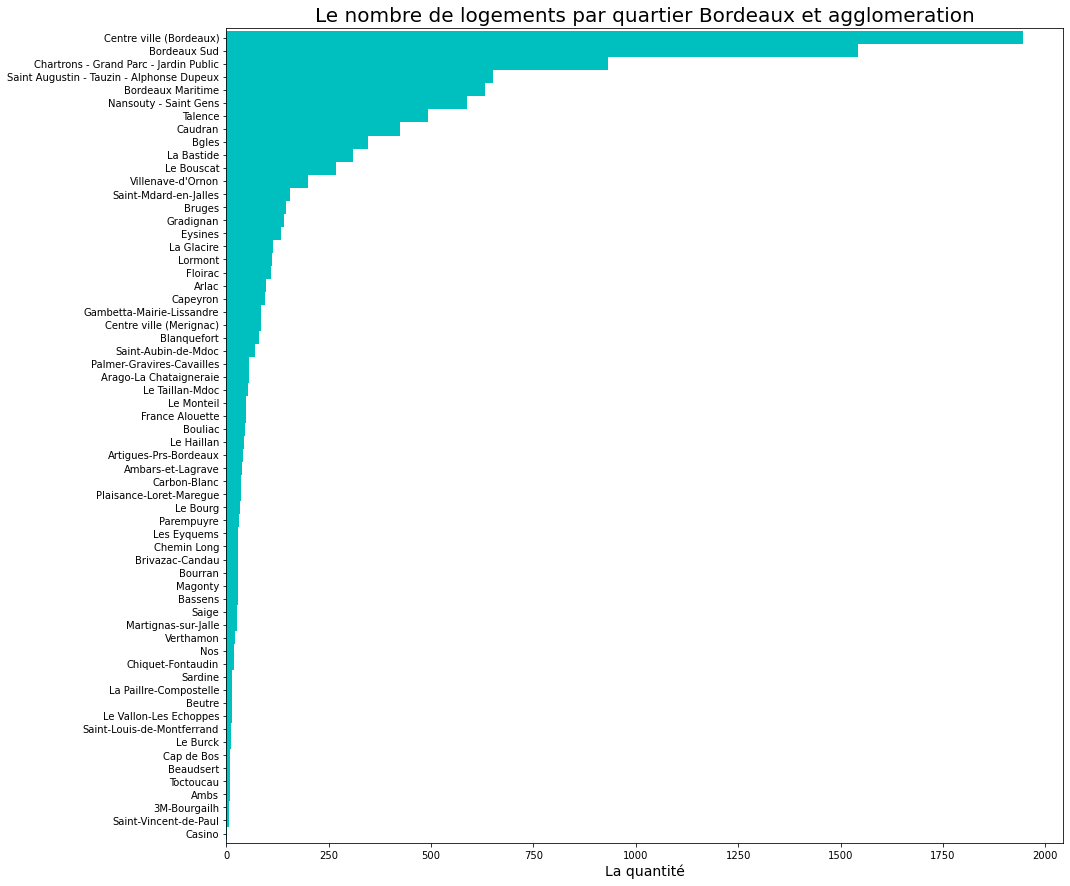

In [5]:
# 3. En utilisant la bibliothéque MatplotLib vous allez afficher le graphique avec les biens par "neighbourhood" 
lieux=quartiers['neighbourhood'].value_counts().sort_values(ascending=True)
lieux.plot.barh(figsize=(15, 15), color='c', width=1)
plt.title("Le nombre de logements par quartier Bordeaux et agglomeration", fontsize=20)
plt.xlabel('La quantité', fontsize=14)
plt.show()

Génial ! Maintenant que nous avons un visuel des biens, il est peu être plus interessant de le voir sur une carte interactive. 

In [6]:
 # 4. On va utiliser "Folium" pour afficher nos resultas. Utilisez le style de carte "FastMarkerCluster" pour un rendu optimal.
 lats2020 = quartiers['latitude'].tolist() # recuperation des donées des colonnes
long2020 = quartiers['longitude'].tolist()
locations = list(zip(lats2020, long2020))

map1 = folium.Map(location=[44.8323068, -0.65200609], zoom_start=12) # coordonées de la vue du départ
FastMarkerCluster(data=locations).add_to(map1) # nom du style de la carte
map1

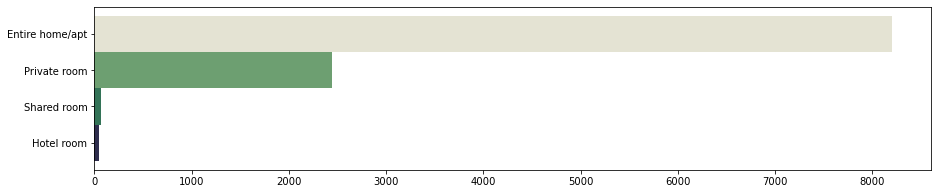

In [7]:
# 5. C'est beau mais pas assez clairifié, voyons quel type de logement est proposer. Utilisez "MatplotLib"
type_log = quartiers['room_type']. value_counts().sort_values(ascending=True)
type_log.plot.barh(figsize=(15, 3), width=1, color = ["#2E2D4D","#337357","#6D9F71", "#E4E3D3"]) # les couleurs personelles
plt.show()

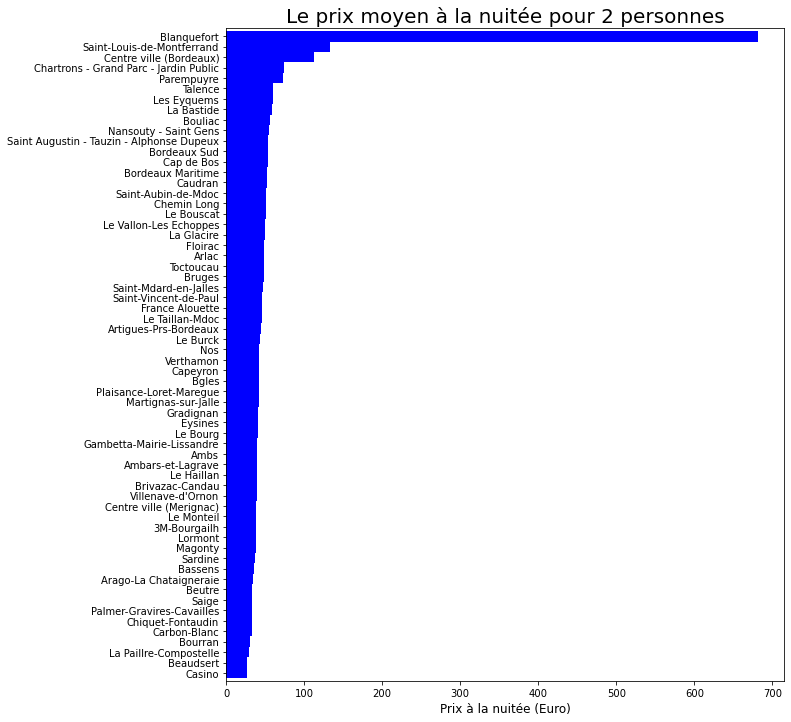

In [12]:
# 6. Idem via MatplotLib affichez le tarif à la nuitée par quartier en faisant une moyenne.
feq = quartiers[quartiers['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 12), color='b', width=1)
plt.title("Le prix moyen à la nuitée pour 2 personnes", fontsize=20)
plt.xlabel('Prix à la nuitée (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

Soufflez vous y êtes presque, maintenant il est temps d'aller de voir les propriétaires, Tok Tok !

In [9]:
# 7. Reperez le nombre d'identifiants
quartiers['host_id'].nunique()

8871

In [13]:
# 8. Si quelque chose ne colle pas entre le nombre de logement et le nombre de propriétaires alors il est temps de compter nombre de biens par propriétaire. Top 15
prop = pd.value_counts(quartiers.host_id).head(15)
prop

160814130    105
72691486      79
9382960       75
164626639     28
47630405      25
29102137      22
15116567      20
18796190      17
17832583      15
176917500     14
145119146     14
4310833       13
173639954     12
23693602      11
20597820      10
Name: host_id, dtype: int64

In [7]:
# 9. Une fois que vous avez obtenu la liste, penchez sur le champion
gourmand = quartiers[quartiers['host_id']== 160814130]
gourmand = gourmand[['host_id', 'host_name']]
gourmand.index.name = "listing_id"
gourmand.head()

,host_id,host_name
listing_id,,
23180932,160814130,Thibaut
28265631,160814130,Thibaut
29020992,160814130,Thibaut
30058018,160814130,Thibaut
33208771,160814130,Thibaut


In [9]:
# 10. B.O.N.U.S : afficher le tableau avec la presentation des top 10 host, leurs prenom et le nombre de biens qu'ils possedent.
gourmand = quartiers[quartiers['host_id']== 160814130]
gourmand = gourmand[['name','host_id', 'host_name', 'latitude', 'longitude']]
gourmand.index.name = "listing_id"
gourmand.head()

,name,host_id,host_name,latitude,longitude
listing_id,,,,,
23180932,Super T2 - Grands Hommes,160814130,Thibaut,44.84361,-0.58184
28265631,"Spacious T1bis - Area ""Saint-Michel""",160814130,Thibaut,44.83601,-0.56587
29020992,AGENCE PRO - 48m ² ideal,160814130,Thibaut,44.82519,-0.58390
30058018,A nice house with garden! Saint-Jean,160814130,Thibaut,44.82838,-0.56153
33208771,Cute studio in the center of Bordeaux,160814130,Thibaut,44.83360,-0.56635
